# Tasca M4T02

## Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

https://github.com/patriciaapenat/Data-Science-It-Academy/blob/63bf4116341a125e0185f384d3b1c74afa24ef6e/Sprint%204/Tasca%20M4T02ex1.ipynb

## Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

    Important: El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [34]:
#Càrreguem les llibreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#Ara les dades

path=r'https://raw.githubusercontent.com/patriciaapenat/Data-Science-It-Academy/main/Sprint%204/movies.dat'
data = pd.read_csv(path,
                       sep='::',
                       encoding = 'ISO-8859-1',
                       index_col = 0,
                       names = ['Index','Película','Género','Año'],
                       engine = 'python',
                      )
data = pd.DataFrame(data)
data.head(5)

,Película,Género,Año
Index,,,
1,Toy Story (1995),Animation|Children's|Comedy,NaN
2,Jumanji (1995),Adventure|Children's|Fantasy,NaN
3,Grumpier Old Men (1995),Comedy|Romance,NaN
4,Waiting to Exhale (1995),Comedy|Drama,NaN
5,Father of the Bride Part II (1995),Comedy,NaN


In [36]:
df.shape

(3883, 3)

    Primer fem una còpia del nostre dataset

In [37]:
df = data.copy(deep=True)

    També hem de corregir el any, hem de separar-ho de Película i crear una nova columna amb aquesta informació

In [38]:
df['Año'] = df['Película'].str[-5:-1].astype(int)
df['Película'] = df['Película'].str[:-6]

    No més deixem el primer gènere

In [39]:
df['Género'] = df['Género'].str.split("|").str[0]

    i fem reindexació

In [41]:
df = df.reindex(columns=['Película','Año','Género'])

In [44]:
df.head(10)

,Película,Año,Género
Index,,,
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy
6,Heat,1995,Action
7,Sabrina,1995,Comedy
8,Tom and Huck,1995,Adventure
9,Sudden Death,1995,Action


    Des de fora tot sembla correcta, però anem a comprovar-ho

In [14]:
df.dtypes #Els tipus

Película    object
Año          int32
Género      object
dtype: object

In [19]:
df.columns #Noms de les columnes

Index(['Película', 'Año', 'Género'], dtype='object')

In [26]:
df.isnull().any() #Mirem si hi ha valors nuls

Película    False
Año         False
Género      False
dtype: bool

In [79]:
df['Año'].describe()

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: Año, dtype: float64

## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

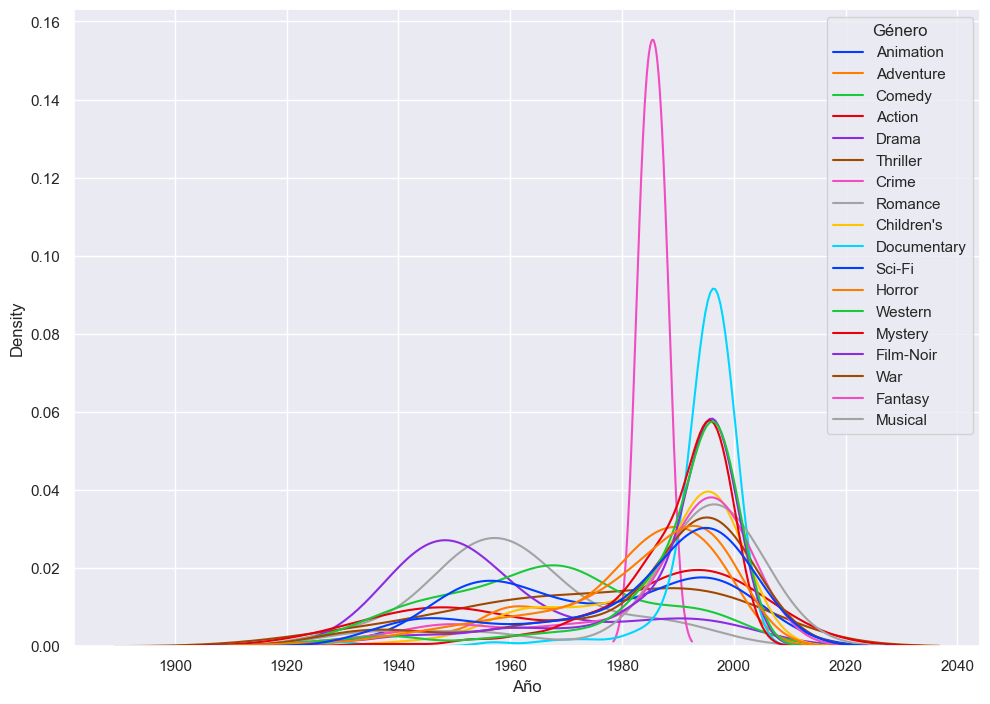

In [75]:
a = sns.kdeplot(x='Año', 
                 hue ='Género', 
                 data=df,
                 common_norm = False,
                 palette="bright",
                )

sns.set(rc = {'figure.figsize' :(11.7,8.27)})

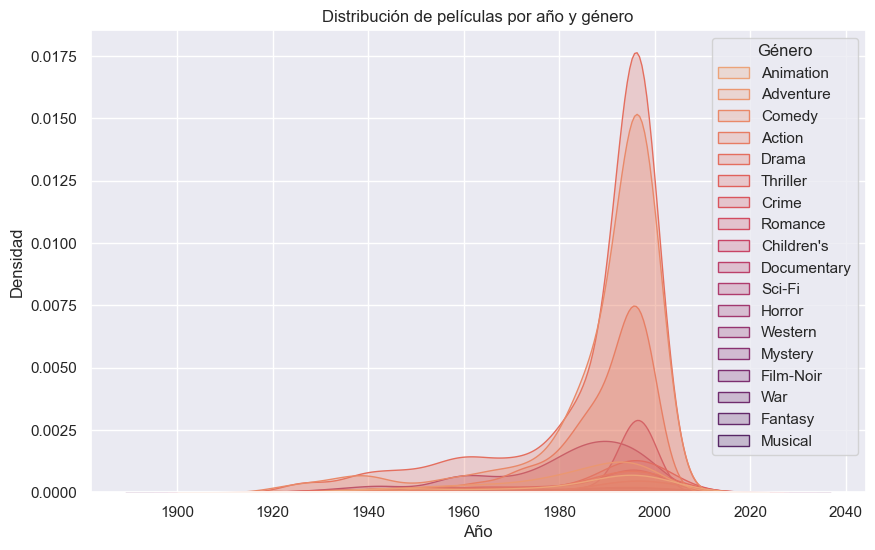

In [76]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(df['Duración'], df['Año'])

# Título y etiquetas de los ejes
plt.title('Relación entre Duración y Año')
plt.xlabel('Duración')
plt.ylabel('Año')

# Mostrar el gráfico
plt.show()


In [86]:
import matplotlib.pyplot as plt

# Obtener los valores únicos y sus frecuencias en la columna 'Género'
generos_counts = df['Género'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(generos_counts, labels=generos_counts.index, startangle=90, autopct='%1.1f%%')

# Título
plt.title('Distribución de Géneros')

# Hacer que el gráfico de pastel sea un círculo en lugar de una elipse
plt.axis('equal')

# Mostrar el gráfico
plt.show()


TypeError: pie() got an unexpected keyword argument 'palette'

<Figure size 600x600 with 0 Axes>

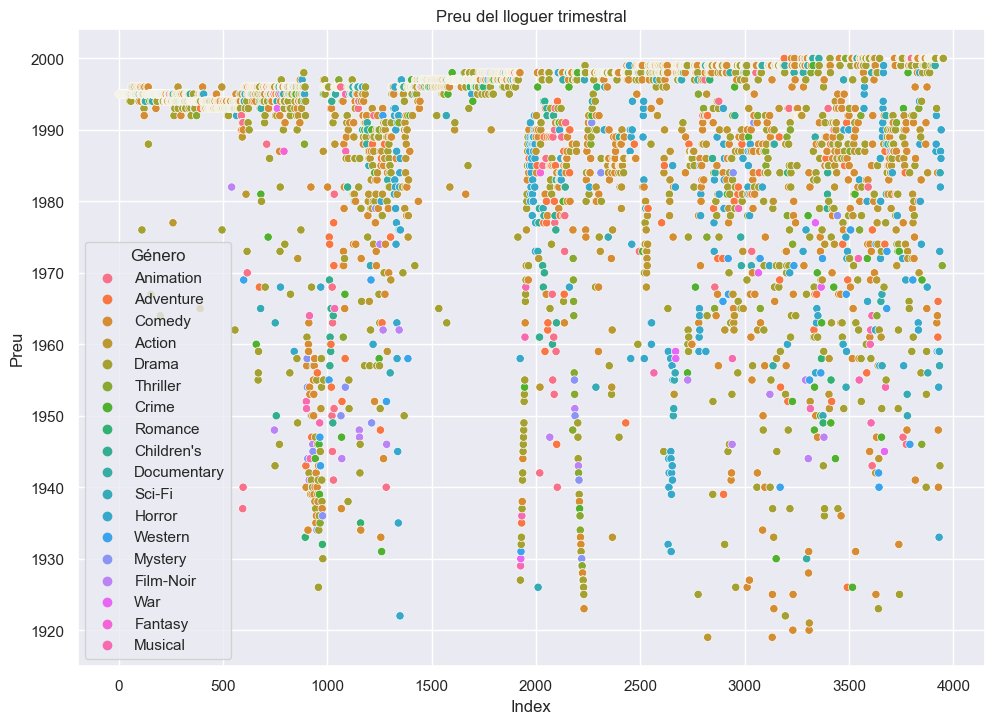

In [85]:
sns.scatterplot(data=df, x=df.index, y='Año',hue='Género')

plt.xlabel('Index')
plt.ylabel('Preu')
plt.title('Preu del lloguer trimestral')
plt.show()